# Stock Market Analysis And Prediction

## Probem Statement

In the recent past, the industry of wealth management has seen a lot of growth. Every individual or business actively searches for opportunities to get the maximum returns. However, in most of the cases, they either lack the skills to identify the right investment opportunity, or there is a shortage of time for finding these opportunities.

A portfolio manager makes investment decisions and carries out other related activities on behalf of vested investors.They are responsible for establishing the best investment strategy, selecting appropriate investments along with the right allocation.
As a Portfolio Manager we requires to analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement.

#### Requirement
We are provided with Potential Clients
1. Mr. Patrick Jyengar (55)
    - A successful entreprenaur - Jyenhar Waterworks (JWW)
    - Considering business succession plan and retirement
    - Always been a conservative investor


2. Mr. Peter Jyengar (32)
    - Inheritor, Risk taker
    - Aggressive in expanding production and marketing efforts
    - Felt financial secure given the successful business of his father.


### Data Description

- Daily stocks data over the period of 10 years - from 1st October 2010 to 30th Sept 2020
- 24 stocks of leading companies listed in New York Sock Exchange (NYSE)
- Four Broad Industries group
    - Aviation
    - Finance
    - Pharma_healthcare
    - Technology
- S&P 500 index prices are also provided

#### Data Taken for prediction

We have cleaned the dataset-
1. For the prediction of next 5 year, we took the data of 5 years from 1st Oct 2015 to 30 Sept 2020
2. Combined 'Close'column of all 24 stocks into single dataset for the standard analysis.

In [1]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Importing Plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly import tools
import plotly.figure_factory as ff

In [2]:
#read data

df = pd.read_csv('StockMarket_ActualData.csv',index_col = 0)

df.head()

S&P500        LUV        AAL         HA        DAL  \
Date                                                                  
01/10/2015  1923.819946  38.410000  39.200001  24.730000  45.410000   
02/10/2015  1951.359985  38.380001  38.630001  24.280001  44.869999   
05/10/2015  1987.050049  39.299999  40.189999  25.500000  46.959999   
06/10/2015  1979.920044  38.000000  38.130001  24.250000  45.090000   
07/10/2015  1995.829956  38.709999  39.310001  24.559999  45.990002   

                  ALK        ALGT    BCS         CS         DB  ...  \
Date                                                            ...   
01/10/2015  80.230003  217.979996  14.92  24.990000  30.469999  ...   
02/10/2015  79.260002  215.589996  14.31  24.240000  28.820000  ...   
05/10/2015  80.910004  216.059998  14.00  23.809999  28.360001  ...   
06/10/2015  74.529999  208.600006  14.04  23.790001  28.660000  ...   
07/10/2015  75.970001  213.839996  14.28  23.610001  28.719999  ...   

                  MRK        PFE      RHHBY         UNH       AAPL  \
Date                                                                 
01/10/2015  49.369999  31.840000  33.220001  116.610001  27.395000   
02/10/2015  50.139999  33.080002  33.320000  118.830002  27.594999   
05/10/2015  51.230000  33.480000  33.439999  119.650002  27.695000   
06/10/2015  49.799999  32.790001  33.529999  116.050003  27.827499   
07/10/2015  50.950001  33.290001  32.549999  116.430000  27.695000   

                  AMZN         FB        GOOG         IBM       MSFT  
Date                                                                  
01/10/2015  520.719971  44.610001  611.289978  114.986984  44.610001  
02/10/2015  532.539978  45.570000  626.909973  115.779770  45.570000  
05/10/2015  543.679993  46.630001  641.469971  119.351326  46.630001  
06/10/2015  537.479980  46.750000  645.440002  119.143120  46.750000  
07/10/2015  541.940002  46.799999  642.359985  120.192162  46.799999  

[5 rows x 25 columns]

We are keeping copy of dataset to use further

In [3]:
df1 = df.copy()


In [4]:
df.tail()

S&P500        LUV    AAL     HA        DAL        ALK  \
Date                                                                     
24/09/2020  3246.590088  36.860001  11.77  12.40  29.010000  35.700001   
25/09/2020  3298.459961  37.099998  12.29  12.80  29.780001  36.700001   
28/09/2020  3351.600098  38.240002  12.76  13.38  31.340000  37.540001   
29/09/2020  3335.469971  37.610001  12.25  12.86  30.610001  36.669998   
30/09/2020  3363.000000  37.500000  12.29  12.89  30.580000  36.630001   

                  ALGT   BCS     CS    DB  ...        MRK        PFE  \
Date                                       ...                         
24/09/2020  121.500000  9.42  13.26  7.66  ...  83.150002  35.759998   
25/09/2020  123.760002  9.45  13.41  7.66  ...  82.930000  36.049999   
28/09/2020  127.110001  9.42  13.43  7.72  ...  82.760002  36.389999   
29/09/2020  121.089996  9.52  13.45  7.78  ...  81.900002  36.169998   
30/09/2020  119.800003  9.76  13.75  8.33  ...  82.949997  36.700001   

                RHHBY         UNH        AAPL         AMZN          FB  \
Date                                                                     
24/09/2020  44.700001  292.660004  108.220001  3019.790039  203.190002   
25/09/2020  44.820000  302.500000  112.279999  3095.129883  207.820007   
28/09/2020  44.110001  303.230011  114.959999  3174.050049  209.440002   
29/09/2020  43.369999  304.149994  114.089996  3144.879883  207.259995   
30/09/2020  42.810001  311.769989  115.809998  3148.729980  210.330002   

                   GOOG         IBM        MSFT  
Date                                             
24/09/2020  1428.290039  118.089996  203.190002  
25/09/2020  1444.959961  118.949997  207.820007  
28/09/2020  1464.520020  121.730003  209.440002  
29/09/2020  1469.329956  120.940002  207.259995  
30/09/2020  1469.599976  121.669998  210.330002  

[5 rows x 25 columns]

We can observe data is present from 1st Oct 2015 to 30th Sept 2020

In [5]:
df.shape

(1259, 25)

There are 1259 rows and 26 columns(24 stocks)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 01/10/2015 to 30/09/2020
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S&P500  1259 non-null   float64
 1   LUV     1259 non-null   float64
 2   AAL     1259 non-null   float64
 3   HA      1259 non-null   float64
 4   DAL     1259 non-null   float64
 5   ALK     1259 non-null   float64
 6   ALGT    1259 non-null   float64
 7   BCS     1259 non-null   float64
 8   CS      1259 non-null   float64
 9   DB      1259 non-null   float64
 10  GS      1259 non-null   float64
 11  MS      1259 non-null   float64
 12  WFC     1259 non-null   float64
 13  BHC     1259 non-null   float64
 14  JNJ     1259 non-null   float64
 15  MRK     1259 non-null   float64
 16  PFE     1259 non-null   float64
 17  RHHBY   1259 non-null   float64
 18  UNH     1259 non-null   float64
 19  AAPL    1259 non-null   float64
 20  AMZN    1259 non-null   float64
 21  FB      1259 non-null   flo

In [7]:
df.describe()

S&P500          LUV          AAL           HA          DAL  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean   2608.429927    49.521064    36.393948    35.277379    48.221382   
std     394.738078     8.832897    11.486983    11.350796     9.378341   
min    1829.079956    23.870001     9.040000     8.630000    19.190001   
25%    2264.484986    42.415001    30.360001    27.804999    45.274999   
50%    2656.300049    51.880001    37.950001    36.900002    50.340000   
75%    2888.265014    55.935000    45.105002    42.844999    54.744999   
max    3580.840088    66.290001    58.470001    60.299999    63.160000   

               ALK         ALGT          BCS           CS           DB  ...  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000  ...   
mean     66.828475   144.722939    10.776227    16.478896    17.045997  ...   
std      15.353956    24.906476     2.712539     4.965041     7.833877  ...   
min      23.559999    66.230003     6.590000    10.210000     6.440000  ...   
25%      61.635000   130.075005     8.695000    12.955000    11.020000  ...   
50%      66.150002   144.000000    10.220000    15.010000    16.389999  ...   
75%      75.765000   162.590004    11.690000    17.889999    19.319999  ...   
max     100.239998   227.860001    17.980000    29.690001    36.060001  ...   

               MRK          PFE        RHHBY          UNH         AAPL  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     68.029103    36.290810    33.511231   213.125179    47.080191   
std      11.550949     3.814801     4.664290    59.429501    20.993013   
min      48.590000    28.490000    26.389999   109.230003    22.584999   
25%      58.660000    33.465000    30.629999   160.570007    29.821250   
50%      64.089996    35.770000    32.040001   226.639999    42.962502   
75%      79.380001    38.330002    34.470001   259.750000    53.868752   
max      92.040001    46.230000    46.840000   323.700012   134.179993   

              AMZN           FB         GOOG          IBM         MSFT  
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000  
mean   1426.990628   102.185083  1040.788454   128.052921   102.185083  
std     668.360391    45.758418   241.600739    11.073667    45.758418  
min     482.070007    44.610001   611.289978    92.307220    44.610001  
25%     818.119995    62.659999   797.459992   122.579593    62.659999  
50%    1500.000000    93.919998  1055.810059   129.357574    93.919998  
75%    1828.789978   135.220002  1196.440002   134.313881   135.220002  
max    3531.449951   231.649994  1728.280029   155.360657   231.649994  

[8 rows x 25 columns]

In [8]:
df.isnull().sum()

S&P500    0
LUV       0
AAL       0
HA        0
DAL       0
ALK       0
ALGT      0
BCS       0
CS        0
DB        0
GS        0
MS        0
WFC       0
BHC       0
JNJ       0
MRK       0
PFE       0
RHHBY     0
UNH       0
AAPL      0
AMZN      0
FB        0
GOOG      0
IBM       0
MSFT      0
dtype: int64

There are no null values present in dataset

### S&P 500 Analysis

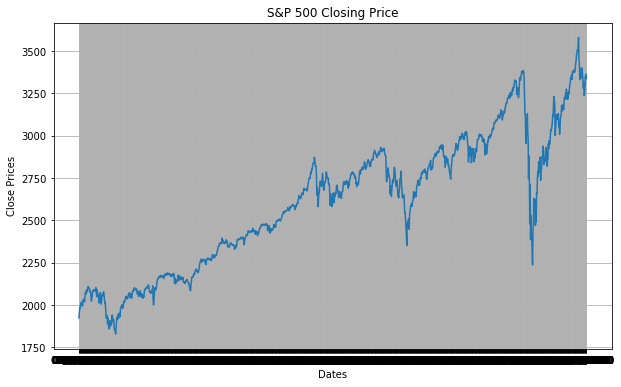

In [9]:
#visualising per day closing price of S&P 500 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['S&P500'])
plt.title('S&P 500 Closing Price')
plt.show()



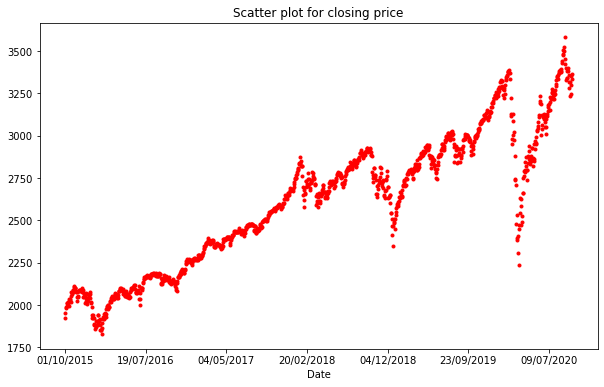

In [10]:
#Let's plot scatter Plot
df_close = df['S&P500']
plt.figure(figsize=(10,6))

df_close.plot(style = '.r')
plt.title('Scatter plot for closing price')
plt.show()

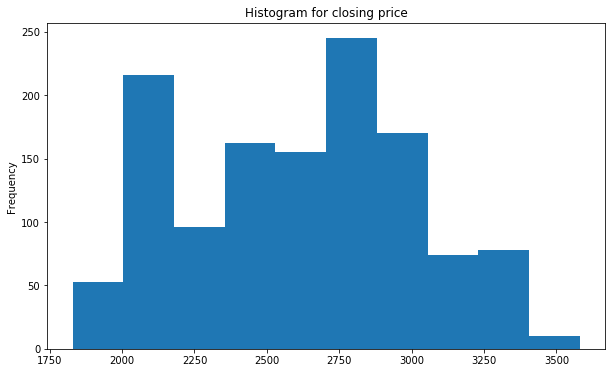

In [11]:
# Histogram of Closing Price
plt.figure(figsize=(10,6))
df_close.plot(kind='hist',style='k.')
plt.title('Histogram for closing price')
plt.show()

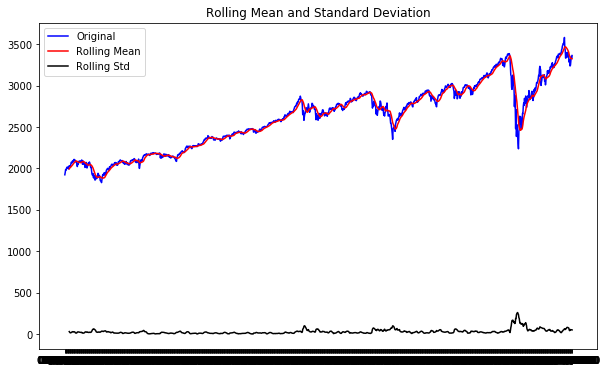

Results of dickey fuller test
Test Statistics                  -1.260128
p-value                           0.647211
No. of lags used                  9.000000
Number of observations used    1249.000000
critical value (1%)              -3.435596
critical value (5%)              -2.863857
critical value (10%)             -2.568004
dtype: float64


In [12]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

For time series analysis we separate Trend and Seasonality from the time series.


<Figure size 720x432 with 0 Axes>

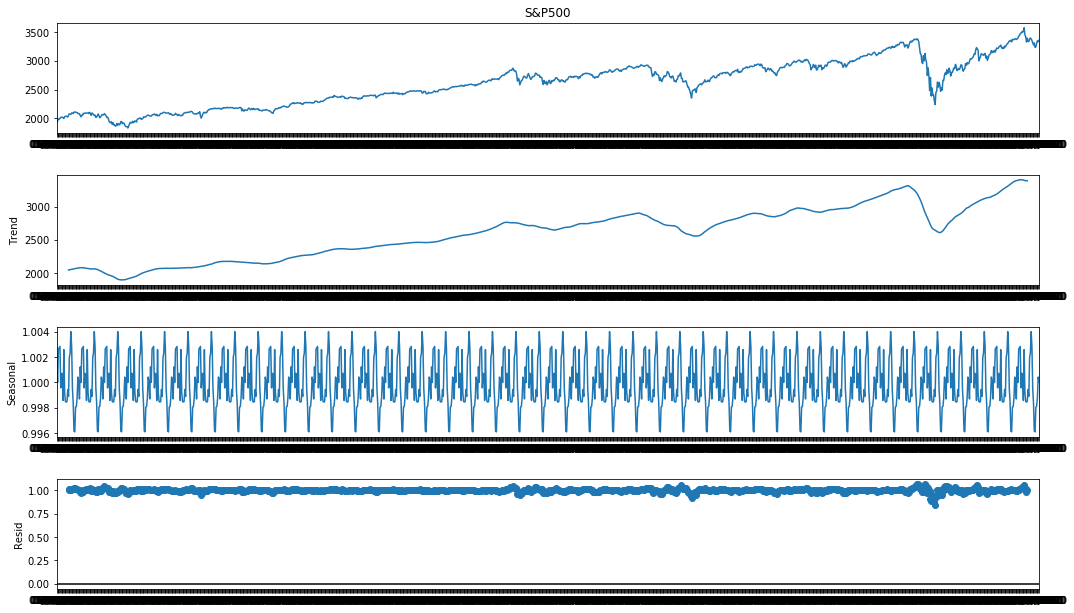

In [13]:
result = seasonal_decompose(df_close,model= 'multiplicative', freq= 30)
fig= plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

No handles with labels found to put in legend.


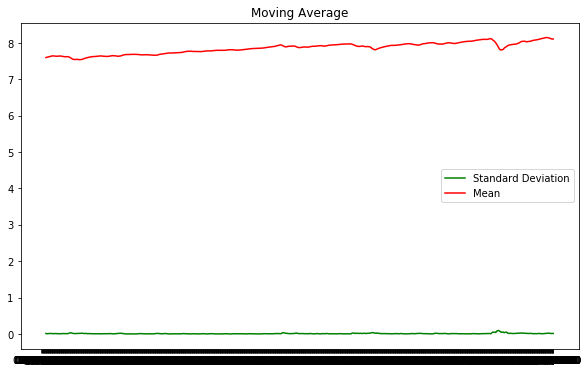

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="green", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

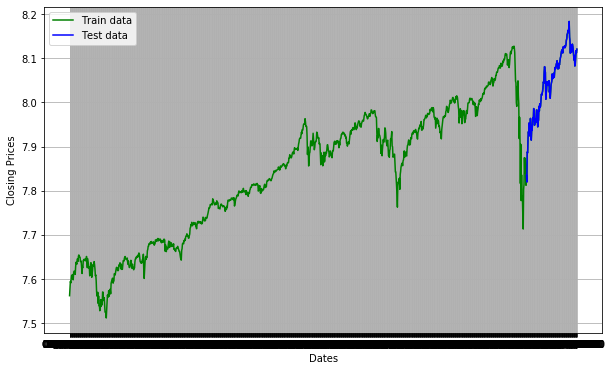

In [15]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

#### ARIMA Model

In [16]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6837.574, Time=1.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6909.668, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6893.336, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6839.256, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6919.377, Time=0.55 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6926.020, Time=0.97 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6922.910, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6898.746, Time=1.18 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-6927.649, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-6920.931, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-6924.546, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-6912.450, Time=0.69 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 7.839 seconds
                               SARIMAX Results                              

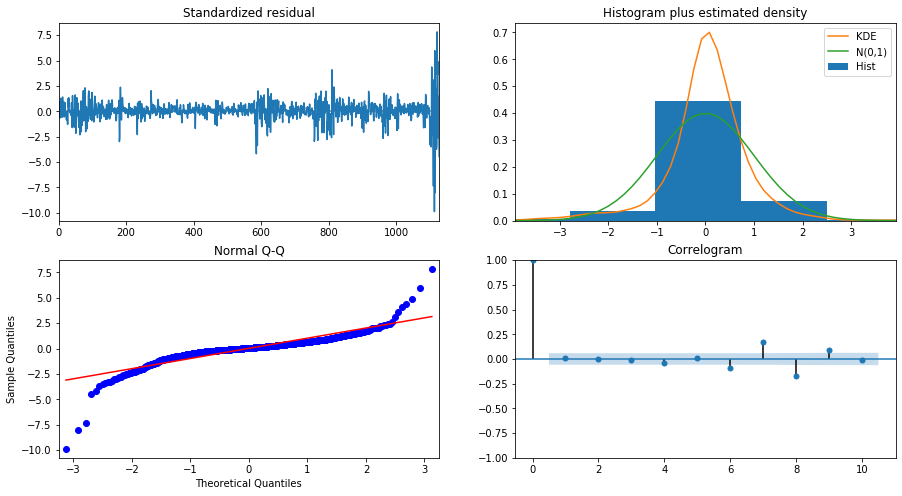

In [17]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [18]:
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

I:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

I:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

I:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

I:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:               D.S&P500   No. Observations:                 1129
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3511.088
Method:                       css-mle   S.D. of innovations              0.011
Date:                Tue, 30 Mar 2021   AIC                          -7008.176
Time:                        21:25:18   BIC                          -6972.973
Sample:                             1   HQIC                         -6994.875
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002      0.000      0.716      0.474      -0.000       0.001
ar.L1.D.S&P500    -1.8086      0.056    -32.304      0.000      -1.918      -1.699
ar.L2.D.S&P500    -0.9919      0.087

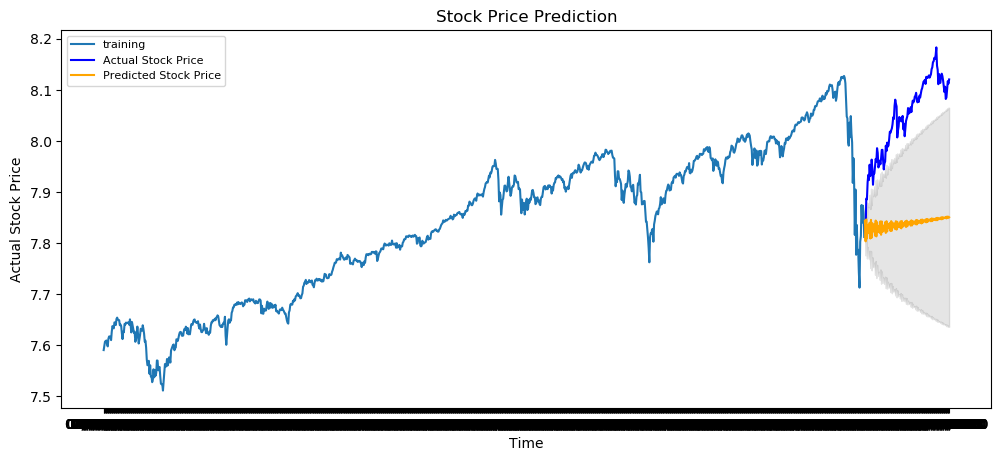

In [19]:
# Forecast
fc, se, conf = fitted.forecast(126, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.04829881589218317
MAE: 0.20867201614996872
RMSE: 0.21976991580328545
MAPE: 0.02585400698431367


Around 2.5% MAPE(Mean Absolute Percentage Error) implies the model is about 97.5% accurate in predicting the test set observations.


## Analysis of All Stocks

In [21]:
df.columns

Index(['S&P500', 'LUV', 'AAL', 'HA', 'DAL', 'ALK', 'ALGT', 'BCS', 'CS', 'DB',
       'GS', 'MS', 'WFC', 'BHC', 'JNJ', 'MRK', 'PFE', 'RHHBY', 'UNH', 'AAPL',
       'AMZN', 'FB', 'GOOG', 'IBM', 'MSFT'],
      dtype='object')

Plotting all stocks 

In [23]:
trace0 = go.Scatter( y=df.LUV, name='LUV')
trace1 = go.Scatter( y=df.AAL, name='AAL')
trace2 = go.Scatter( y=df.HA, name='HA')
trace3 = go.Scatter(y=df.DAL, name='DAL')
trace4 = go.Scatter( y=df.ALK, name='ALK')
trace5 = go.Scatter( y=df.ALGT, name='ALGT')
trace6 = go.Scatter( y=df.BCS, name='BCS')
trace7 = go.Scatter( y=df.CS, name='CS')
trace8 = go.Scatter(y=df.DB, name='DB')
trace9 = go.Scatter( y=df.GS, name='GS')
trace10 = go.Scatter(y=df.MS, name='MS')
trace11 = go.Scatter(y=df.WFC, name='WFC')
trace12 = go.Scatter(y=df.BHC, name='BHC')
trace13 = go.Scatter( y=df.JNJ, name='JNJ')
trace14 = go.Scatter( y=df.MRK, name='MRK')
trace15 = go.Scatter( y=df.PFE, name='PFE')
trace16 = go.Scatter( y=df.RHHBY, name='RHHBY')
trace17 = go.Scatter( y=df.UNH, name='UNH')
trace18 = go.Scatter( y=df.AAPL, name='AAPL')
trace19 = go.Scatter( y=df.AMZN, name='AMZN')
trace20 = go.Scatter( y=df.FB, name='FB')
trace21 = go.Scatter( y=df.GOOG, name='GOOG')
trace22= go.Scatter( y=df.IBM, name='IBM')
trace23= go.Scatter( y=df.MSFT, name='MSFT')




data = [trace0, trace1,trace2,trace3, trace4,trace5,trace6, trace7,trace8,trace9, trace10,trace11,trace12, trace13,trace14,trace15, trace16,trace17,trace18, trace19,trace20,trace21, trace22,trace23,trace23]
py.iplot(data)

### Normalized Stock Prices

In [24]:
def normalize_data(df):
    # df on input should contain only one column with the price data (plus dataframe index)
    min = df.min()
    max = df.max()
    x = df 
    
    # time series normalization part
    # y will be a column in a dataframe
    y = (x - min) / (max - min)
    
    return y

In [25]:
df['NR_LUV'] = normalize_data(df['LUV'])
df['NR_AAL'] = normalize_data(df['AAL'])
df['NR_HA'] = normalize_data(df['HA'])
df['NR_DAL'] = normalize_data(df['DAL'])
df['NR_ALK'] = normalize_data(df['ALK'])
df['NR_ALGT'] = normalize_data(df['ALGT'])
df['NR_BCS'] = normalize_data(df['BCS'])
df['NR_CS'] = normalize_data(df['CS'])
df['NR_DB'] = normalize_data(df['DB'])
df['NR_GS'] = normalize_data(df['GS'])
df['NR_MS'] = normalize_data(df['MS'])
df['NR_WFC'] = normalize_data(df['WFC'])
df['NR_BHC'] = normalize_data(df['BHC'])
df['NR_JNJ'] = normalize_data(df['JNJ'])
df['NR_MRK'] = normalize_data(df['MRK'])
df['NR_PFE'] = normalize_data(df['PFE'])
df['NR_RHHBY'] = normalize_data(df['RHHBY'])
df['NR_UNH'] = normalize_data(df['UNH'])
df['NR_AAPL'] = normalize_data(df['AAPL'])
df['NR_AMZN'] = normalize_data(df['AMZN'])
df['NR_FB'] = normalize_data(df['FB'])
df['NR_GOOG'] = normalize_data(df['GOOG'])
df['NR_IBM'] = normalize_data(df['IBM'])
df['NR_MSFT'] = normalize_data(df['MSFT'])

df.head()

S&P500        LUV        AAL         HA        DAL  \
Date                                                                  
01/10/2015  1923.819946  38.410000  39.200001  24.730000  45.410000   
02/10/2015  1951.359985  38.380001  38.630001  24.280001  44.869999   
05/10/2015  1987.050049  39.299999  40.189999  25.500000  46.959999   
06/10/2015  1979.920044  38.000000  38.130001  24.250000  45.090000   
07/10/2015  1995.829956  38.709999  39.310001  24.559999  45.990002   

                  ALK        ALGT    BCS         CS         DB  ...    NR_MRK  \
Date                                                            ...             
01/10/2015  80.230003  217.979996  14.92  24.990000  30.469999  ...  0.017952   
02/10/2015  79.260002  215.589996  14.31  24.240000  28.820000  ...  0.035673   
05/10/2015  80.910004  216.059998  14.00  23.809999  28.360001  ...  0.060759   
06/10/2015  74.529999  208.600006  14.04  23.790001  28.660000  ...  0.027848   
07/10/2015  75.970001  213.839996  14.28  23.610001  28.719999  ...  0.054315   

              NR_PFE  NR_RHHBY    NR_UNH   NR_AAPL   NR_AMZN     NR_FB  \
Date                                                                     
01/10/2015  0.188839  0.333985  0.034410  0.043102  0.012675  0.000000   
02/10/2015  0.258737  0.338875  0.044761  0.044894  0.016551  0.005133   
05/10/2015  0.281285  0.344743  0.048585  0.045791  0.020204  0.010800   
06/10/2015  0.242390  0.349144  0.031799  0.046978  0.018171  0.011441   
07/10/2015  0.270575  0.301222  0.033571  0.045791  0.019633  0.011709   

             NR_GOOG    NR_IBM   NR_MSFT  
Date                                      
01/10/2015  0.000000  0.359691  0.000000  
02/10/2015  0.013984  0.372264  0.005133  
05/10/2015  0.027019  0.428908  0.010800  
06/10/2015  0.030573  0.425606  0.011441  
07/10/2015  0.027816  0.442243  0.011709  

[5 rows x 49 columns]

Plotting Normalized Stock Prices

In [26]:
trace0 = go.Scatter( y=df.NR_LUV, name='NR_LUV')
trace1 = go.Scatter( y=df.NR_AAL, name='NR_AAL')
trace2 = go.Scatter( y=df.NR_HA, name='NR_HA')
trace3 = go.Scatter(y=df.NR_DAL, name='NR_DAL')
trace4 = go.Scatter( y=df.NR_ALK, name='NR_ALK')
trace5 = go.Scatter( y=df.NR_ALGT, name='NR_ALGT')
trace6 = go.Scatter( y=df.NR_BCS, name='NR_BCS')
trace7 = go.Scatter( y=df.NR_CS, name='NR_CS')
trace8 = go.Scatter(y=df.NR_DB, name='NR_DB')
trace9 = go.Scatter( y=df.NR_GS, name='NR_GS')
trace10 = go.Scatter(y=df.NR_MS, name='NR_MS')
trace11 = go.Scatter(y=df.NR_WFC, name='NR_WFC')
trace12 = go.Scatter(y=df.NR_BHC, name='NR_BHC')
trace13 = go.Scatter( y=df.NR_JNJ, name='NR_JNJ')
trace14 = go.Scatter( y=df.NR_MRK, name='NR_MRK')
trace15 = go.Scatter( y=df.NR_PFE, name='NR_PFE')
trace16 = go.Scatter( y=df.NR_RHHBY, name='NR_RHHBY')
trace17 = go.Scatter( y=df.NR_UNH, name='NR_UNH')
trace18 = go.Scatter( y=df.NR_AAPL, name='NR_AAPL')
trace19 = go.Scatter( y=df.NR_AMZN, name='NR_AMZN')
trace20 = go.Scatter( y=df.NR_FB, name='NR_FB')
trace21 = go.Scatter( y=df.NR_GOOG, name='NR_GOOG')
trace22= go.Scatter( y=df.NR_IBM, name='NR_IBM')
trace23= go.Scatter( y=df.NR_MSFT, name='NR_MSFT')




data = [trace0, trace1,trace2,trace3, trace4,trace5,trace6, trace7,trace8,trace9, trace10,trace11,trace12, trace13,trace14,trace15, trace16,trace17,trace18, trace19,trace20,trace21, trace22,trace23,trace23]
py.iplot(data)

### Compute cumulative returns from close prices

Since the stock prices are available to us for the entire period we can calculate the cumulative return on the entire period 2015-10-01 to 2020-09-30 using formula (b)

In [27]:
cum_return = (df1.iloc[-1] - df1.iloc[0]) / df1.iloc[0]
cum_return

S&P500    0.748085
LUV      -0.023692
AAL      -0.686480
HA       -0.478771
DAL      -0.326580
ALK      -0.543438
ALGT     -0.450408
BCS      -0.345845
CS       -0.449780
DB       -0.726616
GS        0.205288
MS        0.344356
WFC      -0.017367
BHC      -0.913474
JNJ       0.597939
MRK       0.680170
PFE       0.152638
RHHBY     0.288682
UNH       1.673613
AAPL      3.227414
AMZN      5.046878
FB        3.714862
GOOG      1.404096
IBM       0.058120
MSFT      3.714862
dtype: float64

These are the rates of change for each ticker. We will multiple by 100 to get the numbers as percentage change.



In [28]:
cum_return * 100


S&P500     74.808459
LUV        -2.369175
AAL       -68.647960
HA        -47.877072
DAL       -32.658005
ALK       -54.343762
ALGT      -45.040827
BCS       -34.584450
CS        -44.977991
DB        -72.661633
GS         20.528781
MS         34.435552
WFC        -1.736748
BHC       -91.347439
JNJ        59.793934
MRK        68.017012
PFE        15.263822
RHHBY      28.868151
UNH       167.361278
AAPL      322.741369
AMZN      504.687770
FB        371.486208
GOOG      140.409630
IBM         5.811974
MSFT      371.486208
dtype: float64

Looks like Amazon increased almost 504% during the period while FB stock price increased 371.4%


During the same period the S&P 500 market increased only by 74.8%.



### Compute cumulative returns from simple daily returns¶


We will use formula (a) and pandas built in function pct_change to compute the simple returns for each day, each stock in our dataset.



In [29]:
# compute daily returns using pandas pct_change()
df_daily_returns = df1.pct_change()
# skip first row with NA 
df_daily_returns = df_daily_returns[1:]
df_daily_returns.head()

S&P500       LUV       AAL        HA       DAL       ALK  \
Date                                                                     
02/10/2015  0.014315 -0.000781 -0.014541 -0.018196 -0.011892 -0.012090   
05/10/2015  0.018290  0.023971  0.040383  0.050247  0.046579  0.020818   
06/10/2015 -0.003588 -0.033079 -0.051256 -0.049020 -0.039821 -0.078853   
07/10/2015  0.008036  0.018684  0.030947  0.012783  0.019960  0.019321   
08/10/2015  0.008818  0.001292  0.010939  0.062296 -0.000652 -0.002764   

                ALGT       BCS        CS        DB  ...       MRK       PFE  \
Date                                                ...                       
02/10/2015 -0.010964 -0.040885 -0.030012 -0.054152  ...  0.015597  0.038945   
05/10/2015  0.002180 -0.021663 -0.017739 -0.015961  ...  0.021739  0.012092   
06/10/2015 -0.034527  0.002857 -0.000840  0.010578  ... -0.027913 -0.020609   
07/10/2015  0.025120  0.017094 -0.007566  0.002093  ...  0.023092  0.015249   
08/10/2015 -0.005518 -0.016807 -0.016942 -0.016713  ...  0.001374 -0.006008   

               RHHBY       UNH      AAPL      AMZN        FB      GOOG  \
Date                                                                     
02/10/2015  0.003010  0.019038  0.007301  0.022699  0.021520  0.025553   
05/10/2015  0.003601  0.006901  0.003624  0.020919  0.023261  0.023225   
06/10/2015  0.002691 -0.030088  0.004784 -0.011404  0.002573  0.006189   
07/10/2015 -0.029228  0.003274 -0.004761  0.008298  0.001069 -0.004772   
08/10/2015  0.021505 -0.003006 -0.011554 -0.016201  0.013889 -0.004982   

                 IBM      MSFT  
Date                            
02/10/2015  0.006895  0.021520  
05/10/2015  0.030848  0.023261  
06/10/2015 -0.001744  0.002573  
07/10/2015  0.008805  0.001069  
08/10/2015  0.014591  0.013889  

[5 rows x 25 columns]

And finally, the formula (c) on the dataframe of daily returns using pandas' cumprod function.



In [30]:
# Calculate the cumulative daily returns
df_cum_daily_returns = (1 + df_daily_returns).cumprod() - 1
df_cum_daily_returns = df_cum_daily_returns.reset_index()
df_cum_daily_returns.head()



Date    S&P500       LUV       AAL        HA       DAL       ALK  \
0  02/10/2015  0.014315 -0.000781 -0.014541 -0.018196 -0.011892 -0.012090   
1  05/10/2015  0.032867  0.023171  0.025255  0.031136  0.034133  0.008476   
2  06/10/2015  0.029161 -0.010674 -0.027296 -0.019410 -0.007047 -0.071046   
3  07/10/2015  0.037431  0.007810  0.002806 -0.006874  0.012773 -0.053097   
4  08/10/2015  0.046579  0.009112  0.013776  0.054994  0.012112 -0.055715   

       ALGT       BCS        CS  ...       MRK       PFE     RHHBY       UNH  \
0 -0.010964 -0.040885 -0.030012  ...  0.015597  0.038945  0.003010  0.019038   
1 -0.008808 -0.061662 -0.047219  ...  0.037675  0.051508  0.006622  0.026070   
2 -0.043031 -0.058981 -0.048019  ...  0.008710  0.029837  0.009332 -0.004802   
3 -0.018993 -0.042895 -0.055222  ...  0.032003  0.045540 -0.020169 -0.001544   
4 -0.024406 -0.058981 -0.071229  ...  0.033421  0.039259  0.000903 -0.004545   

       AAPL      AMZN        FB      GOOG       IBM      MSFT  
0  0.007301  0.022699  0.021520  0.025553  0.006895  0.021520  
1  0.010951  0.044093  0.045281  0.049371  0.037955  0.045281  
2  0.015788  0.032186  0.047971  0.055866  0.036144  0.047971  
3  0.010951  0.040751  0.049092  0.050827  0.045268  0.049092  
4 -0.000730  0.023890  0.063663  0.045592  0.060519  0.063663  

[5 rows x 26 columns]

Last record of the dataframe multiplied by 100 is giving us the percentage change of the stock prices for our entire period (2015-09-22 to 2020-09-18).



Notice that we've got same results as when we applied formula (b)



In [31]:
cum_return_entire_period = df_cum_daily_returns.iloc[:, 1:].tail(1)
cum_return_entire_period * 100


S&P500       LUV       AAL         HA        DAL        ALK  \
1257  74.808459 -2.369175 -68.64796 -47.877072 -32.658005 -54.343762   

           ALGT       BCS         CS         DB  ...        MRK        PFE  \
1257 -45.040827 -34.58445 -44.977991 -72.661633  ...  68.017012  15.263822   

          RHHBY         UNH        AAPL       AMZN          FB       GOOG  \
1257  28.868151  167.361278  322.741369  504.68777  371.486208  140.40963   

           IBM        MSFT  
1257  5.811974  371.486208  

[1 rows x 25 columns]

### Visualize the returns¶


In [32]:
# reset the index, moving `date` as column
df_daily_returns = df_daily_returns.reset_index()
# use `melt`
df1 = df_daily_returns.melt(id_vars=['Date'],  value_name='daily_return')
# add one more column, showing the daily_return as percent
df1['daily_return_pct'] = df1['daily_return'] * 100
df1

Date variable  daily_return  daily_return_pct
0      02/10/2015   S&P500      0.014315          1.431529
1      05/10/2015   S&P500      0.018290          1.828984
2      06/10/2015   S&P500     -0.003588         -0.358824
3      07/10/2015   S&P500      0.008036          0.803563
4      08/10/2015   S&P500      0.008818          0.881844
...           ...      ...           ...               ...
31445  24/09/2020     MSFT      0.012962          1.296179
31446  25/09/2020     MSFT      0.022787          2.278658
31447  28/09/2020     MSFT      0.007795          0.779518
31448  29/09/2020     MSFT     -0.010409         -1.040874
31449  30/09/2020     MSFT      0.014812          1.481235

[31450 rows x 4 columns]

In [33]:
fig = px.line(df1, x='Date',
              y='daily_return_pct', color='variable',
              title='Performance - Daily Simple Returns',
              labels={'daily_return_pct':'daily returns (%)'})
fig.show()

Transforming the cumulative returns data for plotting.



In [34]:
df2 = df_cum_daily_returns.melt(id_vars=['Date'], value_name='cum_return')
df2['cum_return_pct'] = df2['cum_return'] * 100
df2

Date variable  cum_return  cum_return_pct
0      02/10/2015   S&P500    0.014315        1.431529
1      05/10/2015   S&P500    0.032867        3.286695
2      06/10/2015   S&P500    0.029161        2.916078
3      07/10/2015   S&P500    0.037431        3.743074
4      08/10/2015   S&P500    0.046579        4.657926
...           ...      ...         ...             ...
31445  24/09/2020     MSFT    3.554808      355.480828
31446  25/09/2020     MSFT    3.658597      365.859678
31447  28/09/2020     MSFT    3.694911      369.491139
31448  29/09/2020     MSFT    3.646043      364.604327
31449  30/09/2020     MSFT    3.714862      371.486208

[31450 rows x 4 columns]

In [35]:
fig = px.line(df2, x='Date',
              y='cum_return_pct', color='variable',
              title='Performance - Daily Cumulative Returns',
              labels={'cum_return_pct':'daily cumulative returns (%)', })
fig.show()

#### Statistical Analysis

In [36]:
df_daily_returns.describe().T

count      mean       std       min       25%       50%       75%  \
S&P500  1258.0  0.000517  0.012080 -0.119841 -0.002938  0.000682  0.005213   
LUV     1258.0  0.000245  0.022913 -0.151094 -0.009222  0.000618  0.009990   
AAL     1258.0 -0.000336  0.034725 -0.252246 -0.013623 -0.000480  0.013233   
HA      1258.0  0.000034  0.033132 -0.264971 -0.014908  0.000342  0.015078   
DAL     1258.0  0.000042  0.026478 -0.259924 -0.009714  0.000783  0.009781   
ALK     1258.0 -0.000256  0.026907 -0.232385 -0.010721  0.000206  0.010619   
ALGT    1258.0 -0.000047  0.029101 -0.283300 -0.011305 -0.000363  0.011630   
BCS     1258.0 -0.000130  0.020102 -0.209224 -0.010216  0.000000  0.009683   
CS      1258.0 -0.000297  0.018779 -0.161079 -0.009619  0.000000  0.009764   
DB      1258.0 -0.000738  0.024158 -0.174888 -0.013406 -0.000673  0.011958   
GS      1258.0  0.000261  0.014993 -0.074556 -0.007565  0.000445  0.008715   
MS      1258.0  0.000373  0.016568 -0.101502 -0.008528  0.000337  0.009563   
WFC     1258.0  0.000075  0.013296 -0.092243 -0.007017  0.000000  0.007201   
BHC     1258.0 -0.000897  0.044551 -0.514629 -0.019678 -0.000501  0.018022   
JNJ     1258.0  0.000451  0.012459 -0.100379 -0.004277  0.000493  0.005921   
MRK     1258.0  0.000511  0.014067 -0.088990 -0.006240  0.000245  0.007616   
PFE     1258.0  0.000209  0.013826 -0.077346 -0.005856  0.000115  0.006372   
RHHBY   1258.0  0.000293  0.013514 -0.089609 -0.006237  0.000229  0.006919   
UNH     1258.0  0.000941  0.017810 -0.172769 -0.006644  0.000809  0.008161   
AAPL    1258.0  0.001322  0.018729 -0.128647 -0.006179  0.000951  0.009911   
AMZN    1258.0  0.001611  0.018969 -0.079221 -0.006716  0.001636  0.010765   
FB      1258.0  0.001387  0.017539 -0.147390 -0.005893  0.001225  0.009161   
GOOG    1258.0  0.000834  0.016520 -0.111008 -0.005788  0.000973  0.008785   
IBM     1258.0  0.000174  0.016023 -0.128507 -0.006227  0.000553  0.007004   
MSFT    1258.0  0.001387  0.017539 -0.147390 -0.005893  0.001225  0.009161   

             max  
S&P500  0.093828  
LUV     0.144441  
AAL     0.410970  
HA      0.245837  
DAL     0.210171  
ALK     0.203079  
ALGT    0.292428  
BCS     0.080972  
CS      0.093881  
DB      0.140244  
GS      0.095437  
MS      0.070968  
WFC     0.075849  
BHC     0.337444  
JNJ     0.079977  
MRK     0.104080  
PFE     0.089607  
RHHBY   0.130118  
UNH     0.127989  
AAPL    0.119808  
AMZN    0.132164  
FB      0.142169  
GOOG    0.104485  
IBM     0.113011  
MSFT    0.142169

In [37]:
Stat = pd.DataFrame()

Stat['Average_Daily_Return']=df_daily_returns.mean()*100
Stat['Risk'] = df_daily_returns.std()*100
Stat['Minimum'] = df_daily_returns.min()*100
Stat['Maximum'] = df_daily_returns.max()*100

Stat

Average_Daily_Return      Risk  Minimum  Maximum
S&P500              0.051749  1.208006 -11.9841  9.38277
LUV                 0.024460  2.291330 -15.1094  14.4441
AAL                -0.033611  3.472483 -25.2246   41.097
HA                  0.003424  3.313174 -26.4971  24.5837
DAL                 0.004181  2.647807 -25.9924  21.0171
ALK                -0.025574  2.690691 -23.2385  20.3079
ALGT               -0.004708  2.910086   -28.33  29.2428
BCS                -0.013017  2.010229 -20.9224  8.09717
CS                 -0.029712  1.877867 -16.1079  9.38814
DB                 -0.073800  2.415815 -17.4888  14.0244
GS                  0.026098  1.499341 -7.45564  9.54366
MS                  0.037276  1.656829 -10.1502  7.09678
WFC                 0.007454  1.329616 -9.22429  7.58491
BHC                -0.089683  4.455074 -51.4629  33.7444
JNJ                 0.045050  1.245905 -10.0379  7.99772
MRK                 0.051124  1.406695 -8.89903   10.408
PFE                 0.020852  1.382614 -7.73463  8.96069
RHHBY               0.029271  1.351412 -8.96093  13.0118
UNH                 0.094126  1.781039 -17.2769  12.7989
AAPL                0.132215  1.872922 -12.8647  11.9808
AMZN                0.161053  1.896856 -7.92208  13.2164
FB                  0.138704  1.753947  -14.739  14.2169
GOOG                0.083410  1.652039 -11.1008  10.4485
IBM                 0.017384  1.602250 -12.8507  11.3011
MSFT                0.138704  1.753947  -14.739  14.2169

In [38]:
Stat['Annualized_return'] = Stat['Average_Daily_Return']*252
Stat['Annualized_Risk']= np.sqrt(Stat['Risk']*252)
Stat['Cumulative_return'] = cum_return*100
Stat

Average_Daily_Return      Risk  Minimum  Maximum  Annualized_return  \
S&P500              0.051749  1.208006 -11.9841  9.38277          13.040656   
LUV                 0.024460  2.291330 -15.1094  14.4441           6.163837   
AAL                -0.033611  3.472483 -25.2246   41.097          -8.470057   
HA                  0.003424  3.313174 -26.4971  24.5837           0.862866   
DAL                 0.004181  2.647807 -25.9924  21.0171           1.053570   
ALK                -0.025574  2.690691 -23.2385  20.3079          -6.444588   
ALGT               -0.004708  2.910086   -28.33  29.2428          -1.186343   
BCS                -0.013017  2.010229 -20.9224  8.09717          -3.280172   
CS                 -0.029712  1.877867 -16.1079  9.38814          -7.487331   
DB                 -0.073800  2.415815 -17.4888  14.0244         -18.597584   
GS                  0.026098  1.499341 -7.45564  9.54366           6.576611   
MS                  0.037276  1.656829 -10.1502  7.09678           9.393609   
WFC                 0.007454  1.329616 -9.22429  7.58491           1.878465   
BHC                -0.089683  4.455074 -51.4629  33.7444         -22.600018   
JNJ                 0.045050  1.245905 -10.0379  7.99772          11.352656   
MRK                 0.051124  1.406695 -8.89903   10.408          12.883185   
PFE                 0.020852  1.382614 -7.73463  8.96069           5.254808   
RHHBY               0.029271  1.351412 -8.96093  13.0118           7.376346   
UNH                 0.094126  1.781039 -17.2769  12.7989          23.719727   
AAPL                0.132215  1.872922 -12.8647  11.9808          33.318190   
AMZN                0.161053  1.896856 -7.92208  13.2164          40.585455   
FB                  0.138704  1.753947  -14.739  14.2169          34.953498   
GOOG                0.083410  1.652039 -11.1008  10.4485          21.019428   
IBM                 0.017384  1.602250 -12.8507  11.3011           4.380672   
MSFT                0.138704  1.753947  -14.739  14.2169          34.953498   

        Annualized_Risk  Cumulative_return  
S&P500        17.447565          74.808459  
LUV           24.029464          -2.369175  
AAL           29.581509         -68.647960  
HA            28.894978         -47.877072  
DAL           25.831132         -32.658005  
ALK           26.039475         -54.343762  
ALGT          27.080282         -45.040827  
BCS           22.507280         -34.584450  
CS            21.753679         -44.977991  
DB            24.673578         -72.661633  
GS            19.437949          20.528781  
MS            20.433331          34.435552  
WFC           18.304730          -1.736748  
BHC           33.506398         -91.347439  
JNJ           17.719146          59.793934  
MRK           18.827826          68.017012  
PFE           18.665975          15.263822  
RHHBY         18.454153          28.868151  
UNH           21.185414         167.361278  
AAPL          21.725019         322.741369  
AMZN          21.863389         504.687770  
FB            21.023670         371.486208  
GOOG          20.403768         140.409630  
IBM           20.093957           5.811974  
MSFT          21.023670         371.486208

- Patrick - $1 Million  - 5 yrs  - double return with less risk  - JNJ,MRK

- Peter   - $1 Million  - 5 yrs  - High returns with risk  - AMZN, FB,MSFT, AAPL

## Prediction and Suggestions


We have two investors with their requirement and financial Objectives.

### Mr. Patrik Jyengar
#### Requirents - 
1. Wants to maintain a decent Standard of living post his retirement
2. Has always been conservative investor during his life
3. Available capital of $1 million wants to invest '$500K' in magazine(Naturo) for minority stake and remaining '$500K' in equities.
4. Expect doubling his capital with less risk in 5 years time to buy minority portion of Naturo

#### Suggestions
Investing in the following stocks
- 'JNJ' - it has a capability to increase the price upto 59.7% with the risk of only 17.7%
- 'MRK' - it has a capability to increase the price upto 68% with the risk of only 18.8%



### Mr. Peter Jyengar

#### Requirements -
1. Consistent with his attitude towards risk, he prefers high return investment
2. Believers that he can still bounce back in case of any occasional losses
3. Wants to invest $1 Million from company's cash and cash equivalents in most high margin stocks
4. Ecpects high returns within 5 years for inorganic expansion of JWW

#### Suggestions
Investing in following stocks
- 'AMZN' -  it has a capability to increase the price upto 504.6% with the risk of only 21.8%
- 'FB' -  it has a capability to increase the price upto 371.5% with the risk of only 21%
- 'MSFT' -  it has a capability to increase the price upto 371.5% with the risk of only 21%
- 'AAPL' -  it has a capability to increase the price upto 322.7% with the risk of only 21.7%